<a href="https://colab.research.google.com/github/DesiPilla/DSPS_dPilla/blob/master/HW4/GalrotCurve.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Name: Desiderio Pilla


prepared by federica b bianco @fedhere
for UDel DSPS PHYS 467/667

# testing the significance of Dark Matter

In [1]:
import pandas as pd
import numpy as np
import pylab as pl
%pylab inline


#package I will use for constants and units conversion 
import astropy



Populating the interactive namespace from numpy and matplotlib


In 1970 Vera Rubin published a seminal paper: she measured the rotational speed of HII regions in several galaxies and how it changed as a function of distance to the center of the galaxy. If we believe Newtonian gravity (or GR) we expect that _once all of the mass is included_, i.e. at a radius distance from the center of the galaxy larger than the radius of the galaxy itself, the rotational speed will be proportional to $v\propto\frac{1}/{r}$

## Propagation of  uncertainties rules

below are the basic rules for propagation of uncertainties - use [this as reference](https://github.com/fedhere/DSPS/blob/master/resources/Managing%20Errors%20and%20Uncertainty.pdf)




$$
\begin{eqnarray}
z = x  \pm y  ~| & ~  &dz = \sqrt{dx^2 + dy^2} 
\\
z = x * y  ~| & ~& dz = |xy|  \sqrt{\left(\frac{dx}{x}\right)^2 + 
                                \left(\frac{dy}{y}\right)^2} \\
z = x / y  ~| & ~& dz = \left|\frac{x}{y}\right| \sqrt{\left(\frac{dx}{x}\right)^2 + 
                                                   \left(\frac{dy}{y}\right)^2} \\
z = x^n ~| & ~& dz = |n| ~ x^{n-1}  dx \\
z = \mathrm{c}x ~| & ~& dz = |\mathrm{c}| ~dx \\
z = f(x, y) ~| & ~& dz = \sqrt{\left(\frac{\partial f}{\partial x}\right)^2 dx^2 +\left(\frac{\partial f}{\partial y}\right)^2 dy^2} \\
\end{eqnarray}
$$


# let's assume a Newtonian framework: 
the velocity of a body in orbit depends only on the gravitational field of the mass that attracts it, and we can assume that mass is concentrated in the center of mass of (the center for simplicity) the system

with G the gravitational constant, $r$ the radius, and $m(r)$ the mass contained within that radius we have the orbital velocity $v$:



$v = \frac{G \cdot m(r)}{r}$


Derive this $v\propto\frac{1}{r}$ from Newron's law $F~=~\frac{GMm}{r^2}$. Write each formula and describe each step. You can use latex (you really just need to know ```\frac{}``` and ```^```) and this reference
https://www.physicsclassroom.com/calcpad/circgrav

$F$ = $\frac{GMm}{r^2}$ Newton's law

$F$ = $\frac{Mv^2}{r}$  Centripetal force

$\frac{GMm}{r^2}$ = $\frac{mv^2}{r}$ Set equal to one another

${v^2}$ = $\frac{GMmr}{Mr^2}$ Solve for ${v}$ 

${v^2}$ = $\frac{Gm}{r}$

${v}$ = $\sqrt{\frac{Gm}{r}}$

Therefore, $v\propto\frac{1}{\sqrt{r}}$

## M31 rotational curve

### data ingestion
( I store the original paper as a link on another computer now I have to find it again :-( - sorry I will updat the reference )

Get the data from the github repository https://github.com/fedhere/DSPS/tree/master/HW4 : there are 2 files: mw.csv and m31.csv. Start with M31, the Andromeda galaxy, Vera Rubin's original target.

Note that the data contains 2 types of uncertainties: one significantly smaller than the other. The ```dv``` uncertainty is the propagation of the uncertainty in the location of the HII line. The uncertainty called ```err``` if the full error budget:  including _all_ sources of uncertainty and not just the uncertainty in measuring the location of the line. Retain both, you will test your hypothesis with each one to see if it matters which uncertainty you choose

In [2]:
m31 = pd.read_csv('https://raw.githubusercontent.com/fedhere/DSPS/master/HW4/m31.csv', header=1)
m31.rename(columns = {'#R(kpc':'radius', 'V(km/s)':'velocity', 'St.dev.':'stdev', 'St.error':'sterror'}, inplace=True)
m31.head()

,radius,velocity,stdev,sterror
0,0.100,183.939,0.000,0.000
1,0.120,190.710,10.265,12.191
2,0.144,204.141,22.634,21.808
3,0.173,207.601,4.573,4.200
4,0.207,210.188,3.943,3.258


In [3]:
m31.describe()

,radius,velocity,stdev,sterror
count,55.000000,55.000000,55.000000,55.000000
mean,205.853182,226.079255,55.034818,16.165855
std,415.523904,42.799892,49.254792,14.876951
min,0.100000,121.974000,0.000000,0.000000
25%,1.177000,208.894500,11.945500,3.224000
50%,13.737000,229.124000,30.697000,12.065000
75%,161.675000,244.102500,99.980000,23.641000
max,1887.071000,414.942000,147.835000,54.110000


from https://en.wikipedia.org/wiki/Andromeda_Galaxy get the extent of the luminous component of M31 (Andromeda). The distance of the Galaxy multiplied by the angular size will give you this information from basic trigonometry (make sure you convert the units properly, using astropy). Make sure you include the uncertainties! uncertainties in the distance will give you the uncertainty in the size
   
 

In [4]:
apparentSizeM31 = 3.167 #deg 3.167/2
distanceM31 = 778 #kpc 

<span style="color:red">**-0.1 pt: for using diameter not radius**</span>

In [5]:
# note : by PEP8 standards the import should be at the top, I leave it here for hyou to see that I am using astropy.units now
from astropy import units as u
m31angS = apparentSizeM31 * u.degree
print("Angular Size of the visible component of Andromeda: {:.4f} ".format(m31angS.to(u.rad)))

Angular Size of the visible component of Andromeda: 0.0553 rad 


<span style="color:red">**-0.1 pt: too much decimal digits: do not keep more digits than original data**</span>

Please make sure you print a sensible number of decimal digits! you have a  number of significant digits set by the number of digit in the info you get from wikipedia

The distance, from Wikipedia, will have an uncertainty. Convert both to kiloparsecs Kpc

In [6]:
M31distUncert = 33
M31distUncert *= u.kpc
distanceM31 *= u.kpc

Print the distance like I printed the angular size. 

To get the physical size of the visible component of andtomeda you can use simple trigonometry: $y = r * sin(\alpha) ~ \sim ~ r \alpha $ for small angles 


Print the physical size of the Andromeda galaxy (remember decimal digits, proper formatting etc etc). 


In [7]:
#print("First measurement outside of the visible radius:")
#round(m31[m31.r > m31size].r.values[0], 2) * u.kpc

visibleSize = distanceM31*m31angS.to(u.rad)/u.rad

dVisibleSize = abs(distanceM31*m31angS.to(u.rad)/u.rad)*((M31distUncert/distanceM31)**2 + (0/m31angS*u.rad)**2)**0.5

print("Angular Size of the visible component of Andromeda: {:.0f} \u00B1 {:.0f}".format(distanceM31.to(u.kpc), M31distUncert))
print("Size of the visible component of Andromeda: {:.1f} \u00B1 {:.1f}".format(visibleSize, dVisibleSize))

Angular Size of the visible component of Andromeda: 778 kpc ± 33 kpc
Size of the visible component of Andromeda: 43.0 kpc ± 1.8 kpc


### find the first measurement  in your data table that includes all the luminous mass. 

What is the smallest radius in your data where the luminous mass is completely included and what is the veolcity at that radius?
You can do it by broadcasting (see homework 3)

<span style="color:red">**-0.25 pt: for missing the code**</span>

We expect the velocity to decrease as 1/r if all mass is included: the velocity at a radius twice as far as the radius that includes all the mass should be a factor 2 slower, three times as far a factor 3 slower. 

write a function that 

1. finds the smallest radius in the dataset that is at least N times the radius of the visible galaxy, 

2. takes as arguments:
    - the data and 
    - N 
    - the size of the luminous component of the galaxy
 
2. Returns the value of the radius and its uncertainty and the velocity and its uncertainty

In [8]:
m31.head()

,radius,velocity,stdev,sterror
0,0.100,183.939,0.000,0.000
1,0.120,190.710,10.265,12.191
2,0.144,204.141,22.634,21.808
3,0.173,207.601,4.573,4.200
4,0.207,210.188,3.943,3.258


In [9]:
def getradii(gal, gsize, n):
  #  Finds the smallest radius in the given data where the luminous mass is completely included.
  #  It also finds the velocity at that radius
   
  #  Parameters: 
  #  gal (object): the galaxy's data 
  #  gsize (object): the size of the luminous component of the galaxy
  #  n (int): number
  
  #  Returns: 
  #  radius (float): smallest radius 
  #  radiusUncert (object): uncertainty of the radius
  #  velocity(float): the velocity at radiusSmall
  #  velocityUncert (object): uncertainty of the velocity
  #  stderror (pandas.core.series.Series): error bar location
  radius, velocity, dvelocity, sterr = gal[gal['radius'] > n*gsize].iloc[0]
  dradius = abs(-2)*radius**(-2-1)*dvelocity
  return radius, dradius, velocity, dvelocity, sterr

getradii(m31, visibleSize, 2)

(102.068,
 0.00024913389424868624,
 213.002,
 132.45600000000002,
 29.320999999999998)

### data visualization

make a plot that shows

1. the rotational curve of the galaxy (as a line)

2. each velocity as an errorbar with error equal to err in the same color as the line in 1

3. each velocity as an errorbar with error equal to dv in  the same color but a different line thickness


4. the datapoint corresponding to N=1, 2, 3 each in a different color. 

5. add a legend that indicates the meaning of each color (```pl.legend()```)

6. add a text that indicates the velocity and its uncertainty (dv and err) just below the largest errorbar (```pl.text()```)

7. limit the x axis to the "relevant" portion of the data

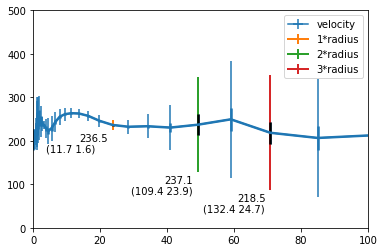

In [10]:
def plotGal(gal, rds):
  #  Plots the rotational curve of the galaxy and the error bars
  
  #  Parameters: 
  #  gal (object): the galaxy's data 
  #  rds (object): given radius 
  
  #  Returns: 
  #  None
  plt.errorbar(gal['radius'], gal['velocity'], xerr=0, yerr=gal['sterror'], c='C0', linewidth=2.5, label=None)
  plt.errorbar(gal['radius'], gal['velocity'], xerr=0, yerr=gal['stdev'], c='C0', linewidth=1.5, label='velocity')
  
  colors = ['C1', 'C2', 'C3']
  for n in range(1, 4):
    radius, dradius, velocity, dvelocity, sterr = getradii(gal, rds, n)
    plt.errorbar(radius, velocity, yerr = dvelocity, linewidth=2, c=colors[n-1], label=(str(n)+'*radius'))
    plt.errorbar(radius, velocity, yerr = sterr, linewidth=2.5, c='k')
    plt.text(radius - 10, velocity - dvelocity - 25, '%.1f' % velocity)
    plt.text(radius - 20, velocity - dvelocity - 50, '(%.1f %.1f)' % (dvelocity, sterr))
    
  plt.legend()
  plt.xlim(0, 100)
  plt.ylim(0, 500)
  
  
plotGal(m31, visibleSize/2)

Write a function that for a given dataset and a given luminous radius and a given N 
  
  1) uses the function above to find the radius at least as large as needed and the velocity at that radius, 
  
  2) states the expected drop in rotational velocities according to Newton's law $v\propto 1/r$
  
  3) calculates the ratio of radii and the ratio of velocities at N radii from the center N=1 and N=N (input, e.g. 2, 3 etc) with uncertainties, 
  
  4) and stated whether that ratio is consistent within the uncertainties with Newton's law $v \propto 1/r$
  
Your function should print 

     - the expected ratio based on the radii, 
     - the calculated ratio using ```dv```, and its uncertainty, - 
     - the 3-$\sigma$ upper and lower limits of the calculated ratio
     - whether the expected ratio is within the $3-\sigma$ of the calculated ratio, 
  5) and the same using ```err```  instead of ```dv```

In [11]:
def vratios(gal, rds, n, err='dveocity'):
  #  Uses the function getradii(gal, gsize, n) to find the radius needed and the velocity at that radius
  #  It also states the expected drop in rotational velocities according to Newton's Law
  #  It then calculates the ratio of the radii and the ratio of the velocities at N radii from the center, along with its uncertainties
  #  It then states whether the ratio is consistent with the uncertainties with Newton's Law
  
  #  Parameters: 
  #  gal (object): the galaxy's data 
  #  rds (object): given radius 
  #  rd (int): given number
  #  err
  
  #  Returns: 
  #  None
  initialRadius, initialVelocity = gal.iloc[0][:2]
  radius, dradius, velocity, dvelocity, sterr = getradii(gal, rds, n)
  if err == 'sterr':
    dvelocity = sterr
  
  rRatio = radius / initialRadius
  expectedVelocity = initialVelocity/(rRatio)**0.5
  expectedRatio = initialVelocity / expectedVelocity
  
  #All bounds should be calculated based on ratio not on velocity itself!! <-----
  upperLimit = velocity + 2*dvelocity
  lowerLimit = velocity - 2*dvelocity
  
  upperRatio =  initialVelocity / max(lowerLimit, 4)
  lowerRatio =  initialVelocity / upperLimit
  
  #print('Initial: %.1f \t Final: %.1f ' % (initialRadius, initialVelocity))
  print("The expected velocity based on the radius is %.1f" % expectedVelocity)
  print("The actual velocity is %.1f \u00B1 %.1f" % (velocity, 2*dvelocity))
  print("The expected expected ratio based on the radius is %.1f" % expectedRatio)  
  print('The 2-\u03C3 lower and upper limits for the calculated ratio are (%.1f, %.1f)' % (lowerRatio, upperRatio))
  message = "\033[4mIS NOT\033[0m"
  if (lowerRatio < expectedRatio < upperRatio):
    message = "\033[4mIS\033[0m"
  print("The expected ratio", message, "within 2-\u03C3 of the calculated ratio")
  

def printVRatios(gal, rds):
  print("\033[1mUsing the Standard Deviation\033[0m\n")
  for n in range(1, 4):
    vratios(gal, rds, n)
    print()

  print("---------------------------------------------------------------------------------------------------")
  print("\033[1mUsing the Standard Error\033[0m\n")
  for n in range(1, 4):
    vratios(gal, rds, n, 'sterr')
    print()

printVRatios(m31, visibleSize/2)

Using the Standard Deviation

The expected velocity based on the radius is 11.9
The actual velocity is 236.5 ± 23.5
The expected expected ratio based on the radius is 15.4
The 2-σ lower and upper limits for the calculated ratio are (0.7, 0.9)
The expected ratio IS NOT within 2-σ of the calculated ratio

The expected velocity based on the radius is 8.3
The actual velocity is 237.1 ± 218.8
The expected expected ratio based on the radius is 22.2
The 2-σ lower and upper limits for the calculated ratio are (0.4, 10.0)
The expected ratio IS NOT within 2-σ of the calculated ratio

The expected velocity based on the radius is 6.9
The actual velocity is 218.5 ± 264.7
The expected expected ratio based on the radius is 26.6
The 2-σ lower and upper limits for the calculated ratio are (0.4, 46.0)
The expected ratio IS within 2-σ of the calculated ratio

---------------------------------------------------------------------------------------------------
Using the Standard Error

The expected velocity

<span style="color:red">**-0.25 pt: check your velocity and ratio computation code and code should use ratio of v not v itself**</span>

### Discuss!

When using the standard error, the ratio for the expected velocity fell outside of the bounds for the actual velocity ratio. This shows statistical significance that the velocities of bodies farther away from the center of the galaxy *do not* follow Newton's Laws. This supports the theory for Dark Matter, as it is an alternative explanation for the rotational curves.

When using the standard deviation, this was found to be true for the N=1 and N=3 values. At N=2, however, the standard deviation of the measured velocity was too large to draw any significant conclusions.

## do the same for the Milky Way. If your functions were create properly you should be able to reuse them seamlessly

In [12]:
mw = pd.read_csv('https://raw.githubusercontent.com/fedhere/DSPS/master/HW4/mw.csv', header=1)
mw.rename(columns = {'R(kpc)':'radius', 'V(km/s)':'velocity', 'St.dev.':'stdev', 'St.error':'sterror'}, inplace=True)
mw.head()

,radius,velocity,stdev,sterror
0,0.010,119.061,41.832,32.714
1,0.012,115.268,35.199,17.100
2,0.014,117.392,35.152,14.429
3,0.017,118.475,35.252,14.870
4,0.021,110.386,33.817,14.427


In [13]:
visibleSize = 53.5 * u.kpc
dVisibleSize = 7.5 * u.kpc
print("Size of the visible component of the Milky Way: {:.1f} \u00B1 {:.1f}".format(visibleSize, dVisibleSize))

Size of the visible component of the Milky Way: 53.5 kpc ± 7.5 kpc


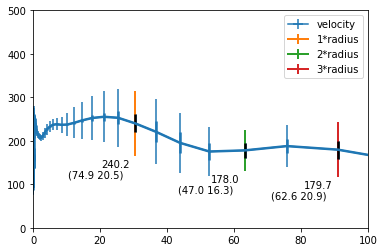

In [14]:
plotGal(mw, visibleSize/2)

In [15]:
printVRatios(mw, visibleSize/2)

Using the Standard Deviation

The expected velocity based on the radius is 2.2
The actual velocity is 240.2 ± 149.8
The expected expected ratio based on the radius is 55.2
The 2-σ lower and upper limits for the calculated ratio are (0.3, 1.3)
The expected ratio IS NOT within 2-σ of the calculated ratio

The expected velocity based on the radius is 1.5
The actual velocity is 178.0 ± 94.0
The expected expected ratio based on the radius is 79.5
The 2-σ lower and upper limits for the calculated ratio are (0.4, 1.4)
The expected ratio IS NOT within 2-σ of the calculated ratio

The expected velocity based on the radius is 1.2
The actual velocity is 179.7 ± 125.2
The expected expected ratio based on the radius is 95.4
The 2-σ lower and upper limits for the calculated ratio are (0.4, 2.2)
The expected ratio IS NOT within 2-σ of the calculated ratio

---------------------------------------------------------------------------------------------------
Using the Standard Error

The expected velocit

**Discussion**
When using the standard error, the ratio for the expected velocity fell outside of the bounds for the actual velocity ratio. This shows statistical significance that the velocities of bodies farther away from the center of the galaxy *do not* follow Newton's Laws. This supports the theory for Dark Matter, as it is an alternative explanation for the rotational curves.

When using the standard deviation, this same conclusions were able to be made.

<span style="color:red">**Due to the code issue you cannot get the right conclusion**</span>